RMSE for landmarks = 2 is 0.9708591625776908


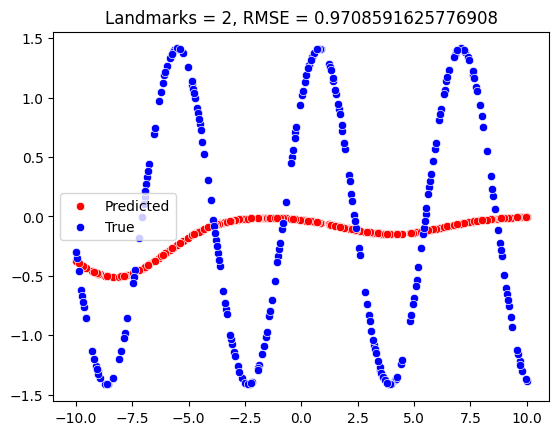

RMSE for landmarks = 5 is 0.7033272460591474


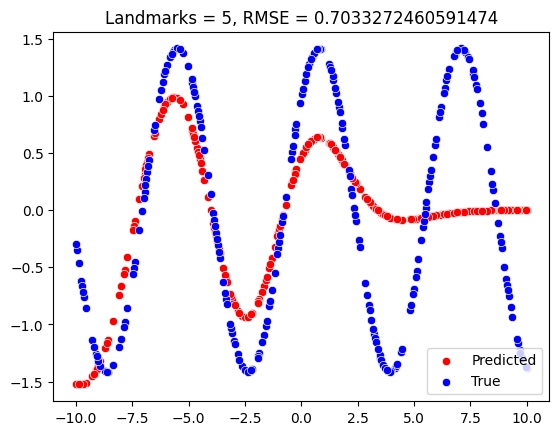

RMSE for landmarks = 20 is 0.1776197538336072


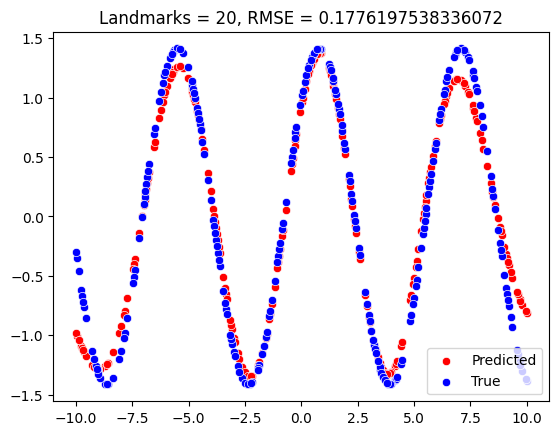

RMSE for landmarks = 50 is 0.09064830482984457


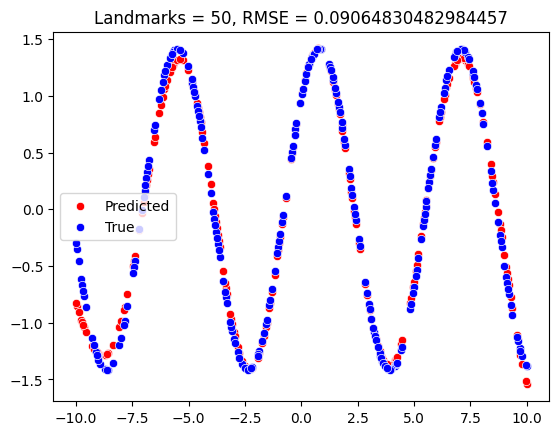

RMSE for landmarks = 100 is 0.05646835928483797


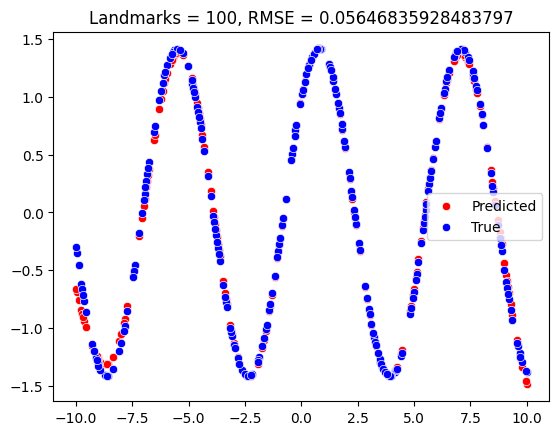

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the load_data function
def load_data(location):
    train_data = np.loadtxt(location+'/ridgetrain.txt')
    test_data = np.loadtxt(location+'/ridgetest.txt')
    x_train, y_train = train_data[:, 0], train_data[:, 1]
    x_test, y_test = test_data[:, 0], test_data[:, 1]
    return x_train, y_train, x_test, y_test

# Define the rbf_landmark_kernel function
def rbf_landmark_kernel(x, y):
    return np.exp(-0.1 * np.square(x.reshape((-1, 1)) - y.reshape((1, -1))))

# Use load_data function to load the data
x_train, y_train, x_test, y_test = load_data('data')
landmark_values = [2, 5, 20, 50, 100]

np.random.seed(69)

# Loop through different landmark values
for landmarks in landmark_values:
    random_landmarks = np.random.choice(x_train, landmarks, replace=False)
    identity_matrix = np.eye(landmarks)
    landmark_features_train = rbf_landmark_kernel(x_train, random_landmarks)
    W = np.dot(np.linalg.inv(np.dot(landmark_features_train.T, landmark_features_train) + 0.1 * identity_matrix),
               np.dot(landmark_features_train.T, y_train.reshape((-1, 1))))
    landmark_features_test = rbf_landmark_kernel(x_test, random_landmarks)
    y_predicted = np.dot(landmark_features_test, W)
    rmse = np.sqrt(np.mean(np.square(y_test.reshape((-1, 1)) - y_predicted)))
    print('RMSE for landmarks =', landmarks, 'is', rmse)
    
    # Plotting
    plt.figure()
    plt.title('Landmarks = ' + str(landmarks) + ', RMSE = ' + str(rmse))
    sns.scatterplot(x=x_test.flatten(), y=y_predicted.flatten(), color='red', label='Predicted')
    sns.scatterplot(x=x_test.flatten(), y=y_test.flatten(), color='blue', label='True')
    plt.legend()
    # plt.savefig(f'part1_landmark_{landmarks}.png')
    plt.show()
